Following the pandas to SQL tutorial by Greg Reda
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## Administrative setup

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns',100)
%matplotlib inline
import seaborn
# Set seaborn aesthetic parameters to defaults - just to make plots stand out!
seaborn.set()

## Exploring Series and DataFrame

Pandas introduces 2 new data structures - series and DataFrame, both built on top of NumPy.

### Introducing Series

Series is a one dimensional object similar to a list or an array, that can take in any datatype. It assigns a labeled index to each item. Alternatively, you can specify index to the series.

In [2]:
s = pd.Series(['abcd',3.14159,True,-12345,None,0.0])
s

0       abcd
1    3.14159
2       True
3     -12345
4       None
5          0
dtype: object

In [3]:
s_hat = pd.Series(['abcd',3.14159,True,-12345,None,0.0],index = ['A','B','C','D','E','F'])
s_hat

A       abcd
B    3.14159
C       True
D     -12345
E       None
F          0
dtype: object

The Series Constructor can be used to convert a dict as well.

In [11]:
d = {'Sydney':4000,'Melbourne':2500,'Adelaide':3200,'Perth':5800,'Hobart':1700,'Darwin':48,'Brisbane':9000}
d

{'Adelaide': 3200,
 'Brisbane': 9000,
 'Darwin': 48,
 'Hobart': 1700,
 'Melbourne': 2500,
 'Perth': 5800,
 'Sydney': 4000}

In [37]:
cities = pd.Series(d)
cities

Adelaide     3200
Brisbane     9000
Darwin         48
Hobart       1700
Melbourne    2500
Perth        5800
Sydney       4000
dtype: int64

In [14]:
print "Dict is of type ", type(d)
print "Series is of type ", type(cities)

Dict is of type  <type 'dict'>
Series is of type  <class 'pandas.core.series.Series'>


Notice how both cities and 'd' are arranged alphabetically.

In [10]:
cities.sort_values()
cities

Darwin         48
Hobart       1700
Melbourne    2500
Adelaide     3200
Sydney       4000
Perth        5800
Brisbane     9000
dtype: int64

In [16]:
d['Adelaide']

3200

In [18]:
cities['Adelaide']

3200

Advantage of Series is that you can select indexes using different strategies

In [17]:
cities[3]

3200

In [19]:
d[3]

KeyError: 3

Also, you can use boolean subsetting. The series returns only the true elements.

In [21]:
cities[cities < 2000]

Darwin      48
Hobart    1700
dtype: int64

In [22]:
d[d < 2000]

KeyError: False

This last part may be a bit weird. How did the subsetting work? This may help.

In [25]:
less_than_2000 = cities < 2000
print less_than_2000
print '\n'
print cities[cities < 2000]

Darwin        True
Hobart        True
Melbourne    False
Adelaide     False
Sydney       False
Perth        False
Brisbane     False
dtype: bool


Darwin      48
Hobart    1700
dtype: int64


You can change the values of elements in a Series on the fly

In [38]:
# changing values of elements below 2000
print cities[cities < 2000]
print '\n'
cities[cities < 2000] = cities.mean()/2
print cities[cities < 2000]

Darwin      48
Hobart    1700
dtype: int64


Darwin    1874.857143
Hobart    1874.857143
dtype: float64


You can subset multiple elements by using double brackets. Single brackets gives you a key error.

In [63]:
cities[['Sydney','Hobart','Melbourne']]

Sydney          4000
Hobart       1874.86
Melbourne       2500
dtype: object

In [64]:
cities['Sydney','Hobart','Melbourne']

KeyError: ('Sydney', 'Hobart', 'Melbourne')

Use idiomatic python to check if an element is in the series or not

In [39]:
print 'Auckland' in cities
print 'Sydney' in cities
print 'sydney' in cities

False
True
False


Append elements to the Series: Very simple. 

In [57]:
cities['Auckland'] = None
cities

Adelaide        3200
Brisbane        9000
Darwin       1874.86
Hobart       1874.86
Melbourne       2500
Perth           5800
Sydney          4000
Auckland        None
dtype: object

You can do mathematical operations on the series elements using scalar operations

In [40]:
cities/3

Adelaide     1066.666667
Brisbane     3000.000000
Darwin        624.952381
Hobart        624.952381
Melbourne     833.333333
Perth        1933.333333
Sydney       1333.333333
dtype: float64

In [41]:
np.square(cities)

Adelaide     10240000.000000
Brisbane     81000000.000000
Darwin        3515089.306122
Hobart        3515089.306122
Melbourne     6250000.000000
Perth        33640000.000000
Sydney       16000000.000000
dtype: float64

Null checking performed using isnull and notnull functions

In [60]:
print cities.isnull()
print '\n'
print cities.notnull()

Adelaide     False
Brisbane     False
Darwin       False
Hobart       False
Melbourne    False
Perth        False
Sydney       False
Auckland      True
dtype: bool


Adelaide      True
Brisbane      True
Darwin        True
Hobart        True
Melbourne     True
Perth         True
Sydney        True
Auckland     False
dtype: bool


You can add 2 series together. Non intersecting values yield NaN

In [65]:
cities[['Adelaide','Sydney','Melbourne','Brisbane']] + cities[['Hobart','Sydney','Melbourne']]

Adelaide      NaN
Brisbane      NaN
Hobart        NaN
Melbourne    5000
Sydney       8000
dtype: object

## Exploring DataFrames

You can create a dataframe by passing a dictionary of lists

In [2]:
data = {'year':[2010,2011,2012,2013,2014,2015,2016],
        'team':['Crows','Lions','Magpies','Bombers','Hawks','Swans','Bulldogs'],
        'wins':[11,8,10,15,11,6,4],
        'losses':[3,4,1,5,6,2,0]}
print type(data)
print '\n'
data

<type 'dict'>




{'losses': [3, 4, 1, 5, 6, 2, 0],
 'team': ['Crows',
  'Lions',
  'Magpies',
  'Bombers',
  'Hawks',
  'Swans',
  'Bulldogs'],
 'wins': [11, 8, 10, 15, 11, 6, 4],
 'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016]}

In [26]:
footie = pd.DataFrame(data)
footie

,losses,team,wins,year
0,3,Crows,11,2010
1,4,Lions,8,2011
2,1,Magpies,10,2012
3,5,Bombers,15,2013
4,6,Hawks,11,2014
5,2,Swans,6,2015
6,0,Bulldogs,4,2016


The columns parameter allows us to tell the dataframe constructor about the ordering and filtering of columns. By default, ordering is alphabetical as seen above.

In [5]:
footie = pd.DataFrame(data,columns = ['year','team','wins','losses'])
footie

,year,team,wins,losses
0,2010,Crows,11,3
1,2011,Lions,8,4
2,2012,Magpies,10,1
3,2013,Bombers,15,5
4,2014,Hawks,11,6
5,2015,Swans,6,2
6,2016,Bulldogs,4,0


In [9]:
footie = pd.DataFrame(data,columns = ['year','team','wins'])
print footie
print '\n'
# note that losses didn't come through because of the columns parameter
footie['losses']

   year      team  wins
0  2010     Crows    11
1  2011     Lions     8
2  2012   Magpies    10
3  2013   Bombers    15
4  2014     Hawks    11
5  2015     Swans     6
6  2016  Bulldogs     4




KeyError: 'losses'

### Read csv files

Downloaded dataset containing location of centrelink offices in australia as of 2015.
Download location - https://data.gov.au/dataset/location-of-centrelink-offices

In [13]:
# "!" command is used to execute shell commands
!head -n 5 centrelink.csv

OFFICE TYPE,SITE NAME,ALTERNATIVE NAME,ADDRESS,SUBURB,STATE,POSTCODE,LATITUDE,LONGITUDE,Open,Close,Closed for lunch/Office Notes
Centrelink Customer Service Centre,Albury,,430 Wilson Street,Albury,NSW,2640,-36.07727,146.92370,08:30:00,16:30:00,No
Centrelink Customer Service Centre,Townsville Jobseekers,,307 Ross River Road,Aitkenvale,QLD,4814,-19.29713,146.76441,08:30:00,16:30:00,No
Centrelink Customer Service Centre,Albany,,15 Peels Place,Albany,WA,6330,-35.02591,117.88466,08:30:00,16:30:00,No
Centrelink Customer Service Centre,Alice Springs,,5 Railway Terrace,Alice Springs,NT,870,-23.69590,133.88036,08:30:00,16:30:00,No


In [14]:
empdata = pd.read_csv('centrelink.csv')
empdata.head()

,OFFICE TYPE,SITE NAME,ALTERNATIVE NAME,ADDRESS,SUBURB,STATE,POSTCODE,LATITUDE,LONGITUDE,Open,Close,Closed for lunch/Office Notes
0,Centrelink Customer Service Centre,Albury,NaN,430 Wilson Street,Albury,NSW,2640,-36.07727,146.92370,08:30:00,16:30:00,No
1,Centrelink Customer Service Centre,Townsville Jobseekers,NaN,307 Ross River Road,Aitkenvale,QLD,4814,-19.29713,146.76441,08:30:00,16:30:00,No
2,Centrelink Customer Service Centre,Albany,NaN,15 Peels Place,Albany,WA,6330,-35.02591,117.88466,08:30:00,16:30:00,No
3,Centrelink Customer Service Centre,Alice Springs,NaN,5 Railway Terrace,Alice Springs,NT,870,-23.69590,133.88036,08:30:00,16:30:00,No
4,Centrelink Customer Service Centre,Tangentyere,NaN,4 Elder Street,Alice Springs,NT,870,-23.69924,133.87184,08:30:00,15:00:00,12:00:00 to 13:00:00


Pandas has several 'reader' functions that have parameters allowing us to do things like skip lines of a file, parse dates, specify how to handle NA datapoints. You can find these here - 

In [22]:
# ?pd.read_csv

Pandas also has similar writer functions for different formats like

In [23]:
# empdata.to_csv('path_to_file.csv')

### Read excel files

Pandas can help read and write Excel files. This means we can read from Excel, write code in Python, and write back into Excel. No need for VBA.

Reading excel files requires a library called "xlrd". You can install it via pip (pip install xlrd)

<img src="https://imgs.xkcd.com/comics/python.png">

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [25]:
import xlrd

Let's write the footie data into an xlsx.

In [27]:
# since index on our footie data is meaningless, there's no need to write it.
footie.to_excel('footie.xlsx',index = False)

In [28]:
!ls -ltr *.xlsx

-rw-r--r--  1 Vivek  staff  5605  1 Jan 20:38 footie.xlsx


In [29]:
# delete the dataframe

del footie

In [30]:
# read from Excel

footie = pd.read_excel('footie.xlsx','Sheet1')
footie

,losses,team,wins,year
0,3,Crows,11,2010
1,4,Lions,8,2011
2,1,Magpies,10,2012
3,5,Bombers,15,2013
4,6,Hawks,11,2014
5,2,Swans,6,2015
6,0,Bulldogs,4,2016


### Reading URL

You can also read directly from a URL. Let me try with the Centrelink url that I provided for the CSV. 

In [36]:
url = 'http://data.gov.au/dataset/70c2b2fe-2a32-450e-98dc-453fe4a02aae/resource/5a45d7b2-8579-425b-bb46-53a0e0bfa053/download/Centrelink-Office-Locations-as-at--2-December-2015.csv'

# let's see how much time it takes to download the data
# need to import the datetime library
from datetime import datetime

print datetime.now().time()
empdata_from_url = pd.read_table(url)
print datetime.now().time()

empdata_from_url.head()

20:52:20.629146
20:52:26.245874


,"OFFICE TYPE,SITE NAME,ALTERNATIVE NAME,ADDRESS,SUBURB,STATE,POSTCODE,LATITUDE,LONGITUDE,Open,Close,Closed for lunch/Office Notes"
0,"Centrelink Customer Service Centre,Albury,,430..."
1,"Centrelink Customer Service Centre,Townsville ..."
2,"Centrelink Customer Service Centre,Albany,,15 ..."
3,"Centrelink Customer Service Centre,Alice Sprin..."
4,"Centrelink Customer Service Centre,Tangentyere..."


If I have a tab separated table, then use the command - sep='\t', otherwise use sep=','

In [38]:
print datetime.now().time()
empdata_from_url = pd.read_table(url,sep=',')
print datetime.now().time()

empdata_from_url.head(3)

20:54:44.227679
20:54:50.622689


,OFFICE TYPE,SITE NAME,ALTERNATIVE NAME,ADDRESS,SUBURB,STATE,POSTCODE,LATITUDE,LONGITUDE,Open,Close,Closed for lunch/Office Notes
0,Centrelink Customer Service Centre,Albury,NaN,430 Wilson Street,Albury,NSW,2640,-36.07727,146.92370,08:30:00,16:30:00,No
1,Centrelink Customer Service Centre,Townsville Jobseekers,NaN,307 Ross River Road,Aitkenvale,QLD,4814,-19.29713,146.76441,08:30:00,16:30:00,No
2,Centrelink Customer Service Centre,Albany,NaN,15 Peels Place,Albany,WA,6330,-35.02591,117.88466,08:30:00,16:30:00,No


### Databases

Pandas has support for reading and writing into databases. Additionally, you can read into pandas from the clipboard as well. But let me get to these at a later time. 

## Introducting the movielens dataset

A very cool dataset comprising of 100,000 ratings made by 943 users on 1,682 movies.

I've downloaded the movielens dataset from <a href="http://grouplens.org/datasets/movielens/">here</a>. The folder ml-100k has a README  that has descriptions for most of the files we will use.

### Ingesting the data

In [2]:
# ingesting the users dataset. firstly, i got an idea about the columns from the readme. 
u_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_csv('~/Downloads/ml-100k/u.user',sep = '|', names=u_cols)
users.head(3)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [3]:
# similarly for ratings
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('~/Downloads/ml-100k/u.data', sep='\t', names=r_cols)
ratings.head(3)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [4]:
# the movies file contains columns indicating the movie's genres
# now, the readme reveals that the first 5 columns of this dataset are descriptors
# and the remaining columns are feature variables for each genre. Let's keep the first 3
# feature variables for kicks but drop the rest. I don't want to clutter the dataset visually.
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','Unknown',
          'Action','Adventure']
movies = pd.read_csv('~/Downloads/ml-100k/u.item', sep='|', names=m_cols, usecols = range(8))
movies.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0


Note that I had to use the parameter "usecols" and limit the dataset extraction to only the first 8 columns. This is the only case where simply specifying the "names" parameter isn't sufficient. If we don't specify usecols, then the column names apply to the last 8 columns only. Makes sense when you think about it, doesn't it? Data is read from the file first and then names needs to be applied in the order of doing things.

### Inspecting the dataset

In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 8 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
Unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 118.3+ KB


In [50]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
Unknown                 int64
Action                  int64
Adventure               int64
dtype: object

In [51]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


You can slice the dataset in any way you want, like so - 

In [52]:
movies[20:23]

,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0
22,23,Taxi Driver (1976),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Taxi%20Driver...,0,0,0


The info method can be used to glance into the dataset as a combination of head and tail, by simply not putting the (), like so - 

In [55]:
ratings.info

<bound method DataFrame.info of        user_id  movie_id  rating  unix_timestamp
0          196       242       3       881250949
1          186       302       3       891717742
2           22       377       1       878887116
3          244        51       2       880606923
4          166       346       1       886397596
5          298       474       4       884182806
6          115       265       2       881171488
7          253       465       5       891628467
8          305       451       3       886324817
9            6        86       3       883603013
10          62       257       2       879372434
11         286      1014       5       879781125
12         200       222       5       876042340
13         210        40       3       891035994
14         224        29       3       888104457
15         303       785       3       879485318
16         122       387       5       879270459
17         194       274       2       879539794
18         291      1042       4     

In [56]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 44.2+ KB


### Selecting information from the dataset

In [60]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [58]:
users['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

Multiple columns can be selected, and even passed into a variable for other operations

In [62]:
print users[['age','occupation']].head()
print '\n'

# can also store into variable for use later
columns_for_use = ['age','occupation']
print users[columns_for_use].head()

   age  occupation
0   24  technician
1   53       other
2   23      writer
3   24  technician
4   33       other


   age  occupation
0   24  technician
1   53       other
2   23      writer
3   24  technician
4   33       other


Notice that i used [[ and ]] in the former command, but only single [ and ] when using the columns_for_use variable. A double bracket signifies a list of a list.

Row selection is like subsetting.

In [70]:
# users older than 25
print users[users['age'] > 25].head(3)
print '\n'

# users aged 40 and male
print users[(users['age'] == 40) & (users['gender'] == 'M')].head(3)
print '\n'

# users younger than 30 OR female
print users[(users['age'] < 30) | (users['gender'] == 'F')].head(3)

   user_id  age gender occupation zip_code
1        2   53      F      other    94043
4        5   33      F      other    15213
5        6   42      M  executive    98101


     user_id  age gender  occupation zip_code
18        19   40      M   librarian    02138
82        83   40      M       other    44133
115      116   40      M  healthcare    97232


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067


One learning for me was that if 2 conditions are being evaluated simultaneously, then it needs to be enclosed within round brackets. Otherwise the interpreter considers the entire expression together, which is meaningless.

Note that the index on the users dataset above is meaningless. Let's check if the user id is indeed unique

In [76]:
print len(users['user_id'])
print len(users['user_id'].unique())

943
943


So we can set user_id as a unique index. Setting it inplace.

In [79]:
print users.head(3)
print '\n'

users.set_index('user_id', inplace = True)
print users.head(3)

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067


         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067


Notice that we have lost the pandas default index. We can select rows based on the index. This has applications when you think of non-numeric indices

Similarly you can use the following command to get the old pandas default index.

<b>users.reset_index(inplace = True)

In [96]:
print users.ix[[1,50,300]]

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
50        21      M      writer    52245
300       26      F  programmer    55106


Mind you, you can select numeric indices using the ":" operator like we saw in the subsetting example. But for some reason, you can't select indices as a list of a list. You get an indices out of bound error. Interesting to note that the lower bound needs to be 1 value lower than the number you want. So, specify lower bound as 0 if you want user_id 1.

In [98]:
print users[0:5]

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


In [103]:
print users[[1,2,3,4,5]]

IndexError: indices are out-of-bounds

## Joining

pandas.merge provides SQL join type of capabilities. The 'how' parameter defines the kind of join. From the docco - 

how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    * left: use only keys from left frame (SQL: left outer join)
    * right: use only keys from right frame (SQL: right outer join)
    * outer: use union of keys from both frames (SQL: full outer join)
    * inner: use intersection of keys from both frames (SQL: inner join)

In [104]:
# ?pd.merge

In [108]:
#  defining the datasets
left_data = pd.DataFrame({'key':range(5),'left_val':['a','b','c','d','e']})
print left_data
print '\n'

right_data = pd.DataFrame({'key':range(2,7),'right_val':['f','g','h','i','j']})
print right_data


   key left_val
0    0        a
1    1        b
2    2        c
3    3        d
4    4        e


   key right_val
0    2         f
1    3         g
2    4         h
3    5         i
4    6         j


Notice how i used range to define a range of integers. Range(2,7) defines integers between 2 to 6 since these are 0 indexed.

In [109]:
# INNER JOIN
pd.merge(left_data, right_data, on= 'key', how='inner')

,key,left_val,right_val
0,2,c,f
1,3,d,g
2,4,e,h


The fields to be joined on for both left and right tables can be specified explicitly, instead of using a generic "ON".

In [118]:
# LEFT OUTER JOIN

pd.merge(left_data,right_data,left_on='key',right_on='key',how= 'left')

,key,left_val,right_val
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


I tried selecting specific rows in the left_data and right_data, but couldn't select only the left_val and right_val. Need to investigate.

Instead of joining on a specific column, you can also join on the index.

In [119]:
pd.merge(left_data,right_data,left_index=True,right_index=True,how='inner')

,key_x,left_val,key_y,right_val
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


The join can be a combination of column on one table and key on the other table.

In [121]:
pd.merge(left_data,right_data,left_index=True,right_on='key',how='inner')

,key,key_x,left_val,key_y,right_val
0,2,2,c,2,f
1,3,3,d,3,g
2,4,4,e,4,h


Similar to a left join, you can also merge like a right outer join, or a full outer join.

In [123]:
pd.merge(left_data,right_data, on = 'key', how='outer')

,key,left_val,right_val
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


### Unioning

Pandas can combine DataFrames along an axis using "pd.concat".

In [127]:
pd.concat([left_data,right_data])

,key,left_val,right_val
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


Pandas offers some more flexibility to an RDBMS by allowing side-by-side concatenation, like so - 

In [128]:
pd.concat([left_data,right_data], axis = 1)

,key,left_val,key,right_val
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


### Grouping

#### Using a new dataset to explore grouping using the chicago salaries. SALARY DATASET.

Why? This is because it'll help me explore the lambda function. You'll see.

Dataset is available here - https://raw.githubusercontent.com/gjreda/gregreda.com/master/content/notebooks/data/city-of-chicago-salaries.csv

In [131]:
url = 'https://raw.githubusercontent.com/gjreda/gregreda.com/master/content/notebooks/"\
       data/city-of-chicago-salaries.csv'
salaries = pd.read_table(url, sep=',')
salaries.head(3)

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$85512.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$75372.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$80916.00


NOTE - I CONTINUED THE LINK IN SECOND LINE BY CLOSING THE DOUBLE QUOTES AND HITTING \ SYMBOL

1. We can see that the employee annual salary has a dollar sign in the beginning, so python will consider it as a string. We need to fix that.
2. Column names are also with spaces and multiple words. Let's fix that as well.

In [136]:
# ?pd.read_table

Check out the "converters" parameter for the read_table or read_csv command. It says

converters : dict, default None
    Dict of functions for converting values in certain columns. Keys can either
    be integers or column labels
    
Let's use this to convert the salary field into float.

In [147]:
# read the salaries data from Greg's github
salaries = pd.read_table(url,
                         sep = ',',
                         converters={'Employee Annual Salary': lambda x: float(x.replace('$', ''))})

# changing column names to single word
headers = ['name','title','department','salary']
salaries.columns = headers

salaries.head(3)

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916


#### Using pandas groupby

In [151]:
by_dept = salaries.groupby('department')
by_dept

Use an aggregate function on these groupings to make sense. COUNT function gives the number of non-null values of each column in each group. SIZE gives the total number of records in each group.

In [155]:
print by_dept.count().head()
print '\n'
print by_dept.size().head()

                   name  title  salary
department                            
ADMIN HEARNG         42     42      42
ANIMAL CONTRL        61     61      61
AVIATION           1218   1218    1218
BOARD OF ELECTION   110    110     110
BOARD OF ETHICS       9      9       9


department
ADMIN HEARNG           42
ANIMAL CONTRL          61
AVIATION             1218
BOARD OF ELECTION     110
BOARD OF ETHICS         9
dtype: int64


Using other functions. Oh, pandas has median as well. pandas - 1, SQL - 0!

In [157]:
print by_dept.mean()[20:25]
print '\n'
print by_dept.median()[20:25]

                         salary
department                     
HUMAN RESOURCES    71337.176471
INSPECTOR GEN      80703.000000
IPRA               82425.035294
LAW                70853.156000
LICENSE APPL COMM  65436.000000


                   salary
department               
HUMAN RESOURCES     68496
INSPECTOR GEN       76116
IPRA                82524
LAW                 66492
LICENSE APPL COMM   65436


Note that it automatically considered 'salary' for median and mean calculations because that was the only float variable.

Note for below - carriage return in ipython notebook is by typing "< b r />" (without the spaces)

#### Perform individual operations within a groupby

SQL example - 

SELECT department, COUNT(DISTINCT title) <br />
FROM salaries<br/>
GROUP BY department<br/>
ORDER BY 2 DESC<br/>
LIMIT 5;

The pandas equivalent is - 

In [161]:
by_dept.title.nunique().order(ascending = False)[:5]
# you can also display top 5 as 
# by_dept.title.nunique().order(ascending = False).head()

/Users/Vivek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

#### Harnessing the power of the 'groupby' in a split-apply-combine situation

Say you want to find the highest paid employee within each department. How would I do this in SQL - 

select b.name, b.department, b.salary<br\>
from salaries b<br\>
inner join<br\>
(Select a.department, max(a.salary) as max_sal<br\>
from salaries a<br\>
group by a.department)<br\>
on a.department = b.department and<br\>
   a.max_sal = b.salary<br\>

Here's an inventive way to do this in pandas.

1. Sort dataset in descending
2. Run groupby and apply a custom function that assigns numbers to each group
3. This gives a rank order within each group
4. If you want the highest paid employee, then simply pick the employees with rank 1.

For the custom function, you can use the numpy arange function.<br/>
np.arange(10) gives evenly spaced numbers until the number i.e 0,1,2,3,4,5,6,7,8,9

In [165]:
def ranker(df_group):
    # assumes employees are sorted in descending order. This way, the highest paid employee will be assigned
    # department_rank of 1
    df_group['department_rank'] = np.arange(len(df_group))+1
    return(df_group)

In [178]:
salaries.sort(columns = 'salary', ascending = False, inplace = True)
salaries_sorted = salaries.groupby('department').apply(ranker)
print "there are ", len(salaries_sorted[salaries_sorted.department_rank == 1]), "department maxxers"
print '\n'
print "Some of them are as follows"
salaries_sorted[salaries_sorted.department_rank == 1][:5]

there are  35 department maxxers


Some of them are as follows


/Users/Vivek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,title,department,salary,department_rank
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004,1
8004,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210,1
25588,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728,1
763,"ANDOLINO, ROSEMARIE S",COMMISSIONER OF AVIATION,AVIATION,186576,1
4697,"CHOUCAIR, BECHARA N",COMMISSIONER OF HEALTH,HEALTH,177156,1


If we want to see top salaries for cops in chicago govt, then - 

In [181]:
salaries_sorted[salaries_sorted.department == 'POLICE'][:10]

,name,title,department,salary,department_rank
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004,1
31587,"WYSINGER, ALFONZA",FIRST DEPUTY SUPERINTENDENT,POLICE,188316,2
19175,"MINIOTIS, CONSTANTINE",SUPERINTENDENT'S CHIEF OF STAFF,POLICE,185004,3
28955,"TRACY, ROBERT J",CHIEF,POLICE,185004,4
8095,"ESCALANTE, JOHN J",CHIEF,POLICE,176532,5
30907,"WILLIAMS, EUGENE E",CHIEF,POLICE,176532,6
11058,"GULLIFORD, WAYNE M",CHIEF,POLICE,176532,7
14999,"KIRBY, DEBRA K",CHIEF,POLICE,176532,8
24921,"ROTI, NICHOLAS J",CHIEF,POLICE,176532,9
24156,"RIVERA, JUAN J",CHIEF,POLICE,176532,10


## Back to the movielens dataset

In [182]:
print users.head(3)
print '\n'
print ratings.head(3)
print '\n'
print movies.head(3)

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067


   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116


   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   

                                            imdb_url  Unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   

   Adventure  
0          0  
1          1  
2   

### Merging all these 3 datasets into one movielens dataset

In [5]:
movielens = pd.merge(movies, ratings)
# turns out that i had converted the user_id column of the users table into the index
movielens = pd.merge(movielens, users, left_on='user_id', right_index=True)
movielens.head(3)

,user_id,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure,user_id_x,rating,unix_timestamp,user_id_y,age,gender,occupation,zip_code
0,308,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,308,4,887736532,309,40,M,scientist,70802
681,308,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,308,5,887737890,309,40,M,scientist,70802
889,308,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,308,4,887739608,309,40,M,scientist,70802


### What are the 25 most rated movies?

In [73]:
movielens.groupby(by='title').rating.size().sort_values(ascending = False)[:25]

title
Star Wars (1977)                             582
Contact (1997)                               509
Fargo (1996)                                 507
Return of the Jedi (1983)                    506
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                428
Raiders of the Lost Ark (1981)               419
Godfather, The (1972)                        412
Pulp Fiction (1994)                          393
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             389
Jerry Maguire (1996)                         383
Chasing Amy (1997)                           379
Rock, The (1996)                             377
Empire Strikes Back, The (1980)              366
Star Trek: First Contact (1996)              365
Titanic (1997)

Another way to achieve this since the dataset is at a movie-rating level is to use the "value_counts" method. 

In [74]:
movielens.title.value_counts()[:25]

Star Wars (1977)                             582
Contact (1997)                               509
Fargo (1996)                                 507
Return of the Jedi (1983)                    506
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                428
Raiders of the Lost Ark (1981)               419
Godfather, The (1972)                        412
Pulp Fiction (1994)                          393
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             389
Jerry Maguire (1996)                         383
Chasing Amy (1997)                           379
Rock, The (1996)                             377
Empire Strikes Back, The (1980)              366
Star Trek: First Contact (1996)              365
Titanic (1997)      

### Which movies are most highly rated?

In [75]:
movielens.groupby(by = 'title').rating.mean().sort_values(ascending = False)[:25]

title
Saint of Fort Washington, The (1993)                      5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Aiqing wansui (1994)                                      5.000000
Great Day in Harlem, A (1994)                             5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                  

There are a lot of movies with perfect 5 rating or a suspicious 4.5 ..<br/>
Overall, these ratings make me suspicious of simply using the mean rating without having a context of the sample size of these ratings. For this, let's use the agg function

In [76]:
highly_rated = movielens.groupby(by = 'title').agg({'rating':[np.size,np.mean]})
highly_rated.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

AGG method can be used as a dictionary to pass the columns that we want aggregation on as the key and a list of functions that we want applied.

In [77]:
highly_rated.sort_values(by = [('rating','mean')], ascending = False)[:25]

rating          
                                                     size      mean
title                                                              
Someone Else's America (1995)                           1  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Aiqing wansui (1994)                                    1  5.000000
They Made Me a Criminal (1939)                          1  5.000000
Star Kid (1997)                                         3  5.000000
Prefontaine (1997)                                      3  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Santa with Muscles (1996)                               2  5.000000
Pather Panchali (1955)                                  8  4.625000
Some Mother's Son (1996)                                2  4.500000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               297  4.471380
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      282  4.443262
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            266  4.383459
Star Wars (1977)                                      582  4.359107
12 Angry Men (1957)                                   125  4.344000

Note the sort index ('rating','mean'). This is because the dataframe is now multi-index. So we need to pass a tuple as the sort index.

As expected, the movies with rating of 5 have very low sample sizes. Let's specify sample sizes of at least 100.

In [78]:
highly_rated[highly_rated[('rating','size')] >= 100].sort_values(by = [('rating','mean')], ascending = False)[:25]
# this can also be specified as:
# highly_rated[highly_rated['rating']['size'] >= 100].sort_values(by = [('rating','mean')], ascending = False)[:25]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               297  4.471380
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      282  4.443262
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            266  4.383459
Star Wars (1977)                                      582  4.359107
12 Angry Men (1957)                                   125  4.344000
To Kill a Mockingbird (1962)                          218  4.293578
Citizen Kane (1941)                                   198  4.292929
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      389  4.287918
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 412  4.281553
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Raiders of the Lost Ark (1981)                        419  4.252983
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       366  4.204918

The SQL equivalent for this would be

SELECT title, COUNT(1) size, AVG(rating) as mean<br/>
FROM highly_rated<br/>
GROUP BY title<br/>
HAVING COUNT(1) >= 100<br/>
ORDER BY 3 DESC<br/>
LIMIT 25

#### Limiting population to the 50 most rated movies

In [7]:
mostrated = movielens.groupby(by = 'title').rating.size().sort_values(ascending = False)[:50]
mostrated.head(3)

title
Star Wars (1977)    582
Contact (1997)      509
Fargo (1996)        507
dtype: int64

We can use this series in an EXISTS, IN or JOIN scenario whenever we want to filter our results. Just an example using EXISTS -

Select * <br/>
from movielens<br/>
where exists (Select 1 from mostrated where movielens.movie_id = mostrated.movie_id);

### Which movies are most wildly different amongst different ages?

Pandas natively integrates into matpplotlib. This is why we can simply call the hist function on the dataframe.

We defined matplotlib.pyplot while instantiating the libraries in order to customise the graphs a bit (ex: axes, titles etc.)

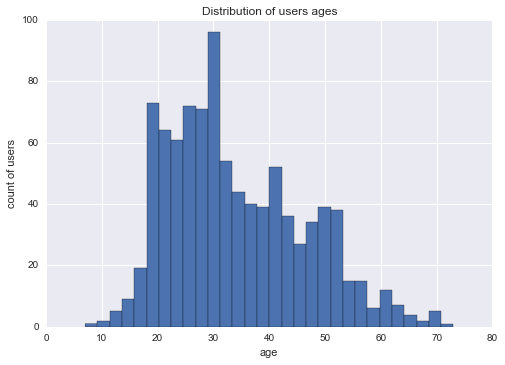

In [80]:
users.age.hist(bins = 30)
plt.title('Distribution of users ages')
plt.ylabel('count of users')
plt.xlabel('age');

In most real cases, the bins need to make more sense. for example, consumers between ages 0 to 14 can be clubbed under the 'children' category, while we may be more interested in the difference in buying patterns between a 22 year old and a 28 year old, so we create 2 separate categories for 20-25 and 25-30. Typically, custom bins in SQL can be created using a case statement - 

Select user_id, age,<br/>
case when age <= 14 then '0 - 14'<br/>
when age >= 15 and age < 20 then '15 - 19'<br/>
when age >= 20 and age < 25 then '20 - 24'<br/>
when age >= 25 and age < 30 then '20 - 29'<br/>
else 'Great than 30' end as age_group<br/>
from users

Pandas has an inbuilt function to slice and dice the data. It's called 'cut'. And it does just that.

In [8]:
labels = ['0-14','14-19','20-24','25-29','Greater than 30']
movielens['age_group'] = pd.cut(movielens.age,[0,15,20,25,30,80],right = False,labels = labels)
movielens[['age','age_group']].drop_duplicates().head(10)

,age,age_group
0,40,Greater than 30
1,34,Greater than 30
2,35,Greater than 30
3,15,14-19
4,17,14-19
5,42,Greater than 30
6,19,14-19
7,36,Greater than 30
8,25,25-29
9,31,Greater than 30


3 points here
- right = False condition tells the function not consider the rightmost bin value i.e. in the above example, it will consider 0 - 14.
- the series specified as [0,15,20,25,30,80] defines the bins. In conjunction with right=False, this series tells the function to cut the age variable as 0-14, 15-19, 20-24 and so on.
- if the bin parameter is a scalar, then it cuts the variable into equal sized partitions.

Now, let's get back to the dataset and cut it into 8 parts of size 10 each.

In [9]:
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
movielens['age_group'] = pd.cut(movielens.age,range(0,81,10),right = False,labels = labels)
movielens[['age','age_group']].drop_duplicates().head(10)

,age,age_group
0,40,40-49
1,34,30-39
2,35,30-39
3,15,10-19
4,17,10-19
5,42,40-49
6,19,10-19
7,36,30-39
8,25,20-29
9,31,30-39


Note the range is 81 because it doesn't include the max range (think why!). So, if we specify np.arange(0,80,10), then the output will be - 

array([ 0, 10, 20, 30, 40, 50, 60, 70])

The histogram above clearly shows users above the age of 70.

Now, let's compare ratings across different age groups.

In [10]:
movielens.groupby(by = 'age_group').agg({'rating':[np.size,np.mean]})

rating          
            size      mean
age_group                 
0-9           34  3.647059
10-19       8044  3.561164
20-29      31975  3.571478
30-39      26018  3.487586
40-49      20518  3.560971
50-59      10215  3.445326
60-69       2679  3.443076
70-79        349  3.504298

#### Let's look at how the 50 most rated movies are viewed across each age group. We can use the mostrated Series we created earlier for filtering.

In [12]:
movielens.set_index('movie_id',inplace = True)

In [18]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99832 entries, 1 to 901
Data columns (total 17 columns):
user_id               99832 non-null int64
title                 99832 non-null object
release_date          99823 non-null object
video_release_date    0 non-null float64
imdb_url              99819 non-null object
Unknown               99832 non-null int64
Action                99832 non-null int64
Adventure             99832 non-null int64
user_id_x             99832 non-null int64
rating                99832 non-null int64
unix_timestamp        99832 non-null int64
user_id_y             99832 non-null int64
age                   99832 non-null int64
gender                99832 non-null object
occupation            99832 non-null object
zip_code              99832 non-null object
age_group             99832 non-null category
dtypes: category(1), float64(1), int64(9), object(6)
memory usage: 13.0+ MB


In [15]:
mostrated.index

Index([u'Star Wars (1977)', u'Contact (1997)', u'Fargo (1996)',
       u'Return of the Jedi (1983)', u'Liar Liar (1997)',
       u'English Patient, The (1996)', u'Scream (1996)', u'Toy Story (1995)',
       u'Air Force One (1997)', u'Independence Day (ID4) (1996)',
       u'Raiders of the Lost Ark (1981)', u'Godfather, The (1972)',
       u'Pulp Fiction (1994)', u'Twelve Monkeys (1995)',
       u'Silence of the Lambs, The (1991)', u'Jerry Maguire (1996)',
       u'Chasing Amy (1997)', u'Rock, The (1996)',
       u'Empire Strikes Back, The (1980)', u'Star Trek: First Contact (1996)',
       u'Titanic (1997)', u'Back to the Future (1985)',
       u'Mission: Impossible (1996)', u'Fugitive, The (1993)',
       u'Indiana Jones and the Last Crusade (1989)',
       u'Willy Wonka and the Chocolate Factory (1971)',
       u'Princess Bride, The (1987)', u'Forrest Gump (1994)',
       u'Saint, The (1997)', u'Monty Python and the Holy Grail (1974)',
       u'Full Monty, The (1997)', u'Men in Black

In [19]:
by_age = movielens.ix[mostrated.index].groupby(['title','age_group'])

In [20]:
type(by_age)

pandas.core.groupby.DataFrameGroupBy

In [28]:
by_age.rating.mean().head(15)

AttributeError: 'Series' object has no attribute 'show'

In [27]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group
title


unable to get unstack to work. this is bad.